In [2]:
#https://github.com/benmiroglio/pymatch
import warnings
warnings.filterwarnings('ignore')
from pymatch.Matcher import Matcher
import pandas as pd
import numpy as np

%matplotlib inline

In [3]:
raw_data = pd.read_csv('loan.csv')

In [4]:
raw_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
raw_data.shape

(887379, 74)

In [6]:
fields_select = [
    "loan_amnt",
    "funded_amnt",
    "funded_amnt_inv",
    "term",
    "int_rate",
    "installment",
    "grade",
    "sub_grade",
    "loan_status"
]

In [8]:
data = raw_data[fields_select]

In [10]:
data.shape

(887379, 9)

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887379 entries, 0 to 887378
Data columns (total 9 columns):
loan_amnt          887379 non-null float64
funded_amnt        887379 non-null float64
funded_amnt_inv    887379 non-null float64
term               887379 non-null object
int_rate           887379 non-null float64
installment        887379 non-null float64
grade              887379 non-null object
sub_grade          887379 non-null object
loan_status        887379 non-null object
dtypes: float64(5), object(4)
memory usage: 60.9+ MB


In [13]:
data.head(5)

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status
0,5000.0,5000.0,4975.0,36 months,10.65,162.87,B,B2,Fully Paid
1,2500.0,2500.0,2500.0,60 months,15.27,59.83,C,C4,Charged Off
2,2400.0,2400.0,2400.0,36 months,15.96,84.33,C,C5,Fully Paid
3,10000.0,10000.0,10000.0,36 months,13.49,339.31,C,C1,Fully Paid
4,3000.0,3000.0,3000.0,60 months,12.69,67.79,B,B5,Current


In [15]:
data.loan_status.value_counts()

Current                                                601779
Fully Paid                                             207723
Charged Off                                             45248
Late (31-120 days)                                      11591
Issued                                                   8460
In Grace Period                                          6253
Late (16-30 days)                                        2357
Does not meet the credit policy. Status:Fully Paid       1988
Default                                                  1219
Does not meet the credit policy. Status:Charged Off       761
Name: loan_status, dtype: int64

In [14]:
test = data[data.loan_status == 'Default']
control = data[data.loan_status == 'Fully Paid']
test['loan_status'] = 1
control['loan_status'] = 0

In [16]:
m = Matcher(test,control,yvar="loan_status",exclude=[])

Formula:
loan_status ~ loan_amnt+funded_amnt+funded_amnt_inv+term+int_rate+installment+grade+sub_grade
n majority: 207723
n minority: 1219


In [17]:
# for reproducibility
np.random.seed(20170925)
m.fit_scores(balance=True,nmodels=100)

Fitting Models on Balanced Samples: 100\100
Average Accuracy: 61.69%


In [18]:
m.predict_scores()

/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


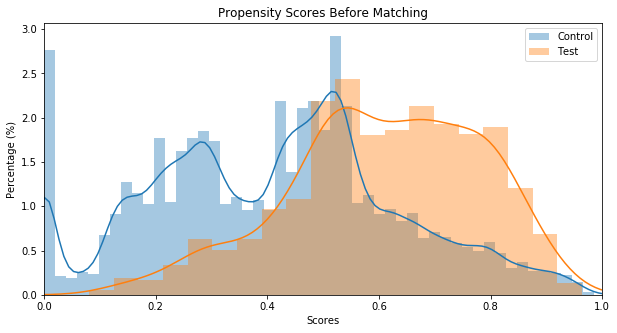

In [19]:
m.plot_scores()

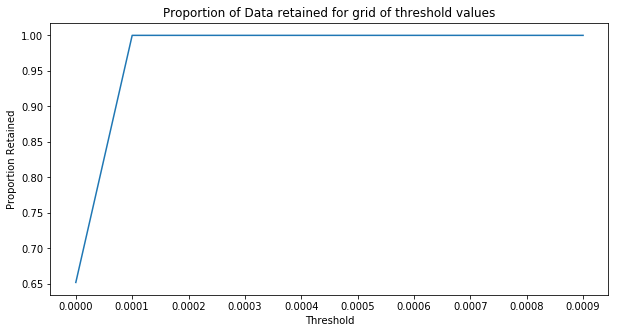

In [20]:
m.tune_threshold(method='random')

In [27]:
m.match(method='min',nmatches=1,threshold=0.0001)

In [28]:
m.record_frequency()

,freq,n_records
0,1,2266
1,2,67
2,3,10
3,4,2


In [29]:
m.assign_weight_vector()

In [30]:
m.matched_data.sort_values("match_id").head(10)

,record_id,weight,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status,scores,match_id
0,0,1.0,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,1,0.651767,0
2158,187948,1.0,8000.0,8000.0,7925.000000,36 months,17.86,288.66,D,D5,0,0.651787,0
1,1,1.0,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,1,0.430890,1
1357,42486,1.0,14125.0,14125.0,14125.000000,36 months,17.76,508.96,D,D1,0,0.430889,1
2,2,1.0,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,1,0.803617,2
2299,198893,0.5,10000.0,10000.0,10000.000000,36 months,19.52,369.20,E,E3,0,0.803623,2
3,3,1.0,15975.0,15975.0,15975.000000,60 months,20.99,432.09,E,E5,1,0.863049,3
2207,192664,1.0,15950.0,15950.0,15950.000000,60 months,20.99,431.42,E,E5,0,0.863042,3
4,4,1.0,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,1,0.803412,4
1243,8014,1.0,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,0,0.803412,4


In [31]:
m.matched_data.shape

(2438, 13)

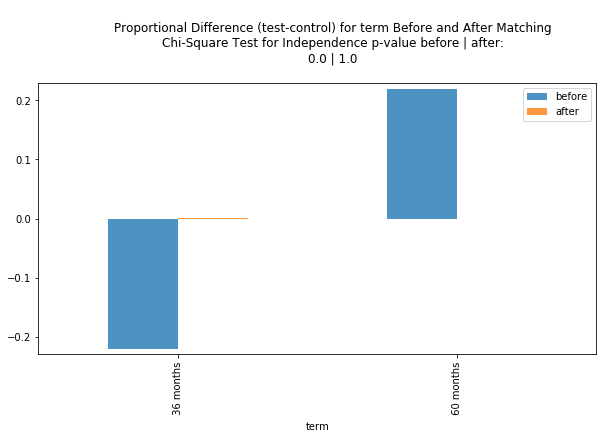

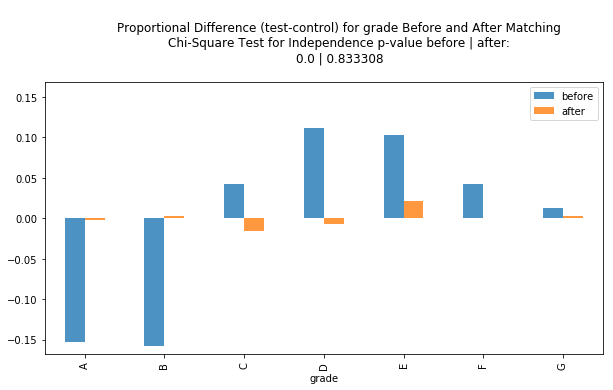

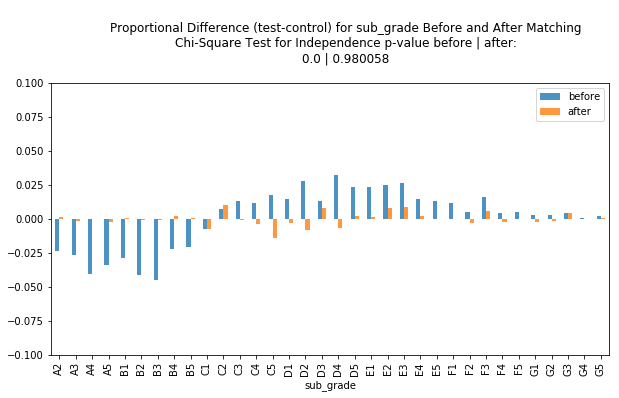

In [32]:
categorical_results = m.compare_categorical(return_table=True)

In [33]:
categorical_results

,var,before,after
0,term,0.0,1.000000
1,grade,0.0,0.833308
2,sub_grade,0.0,0.980058


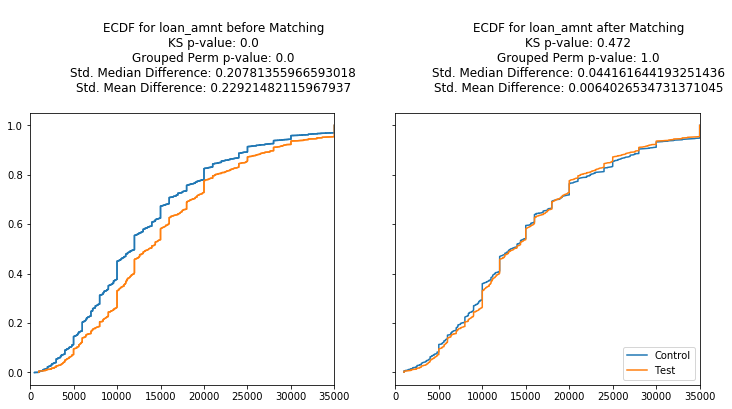

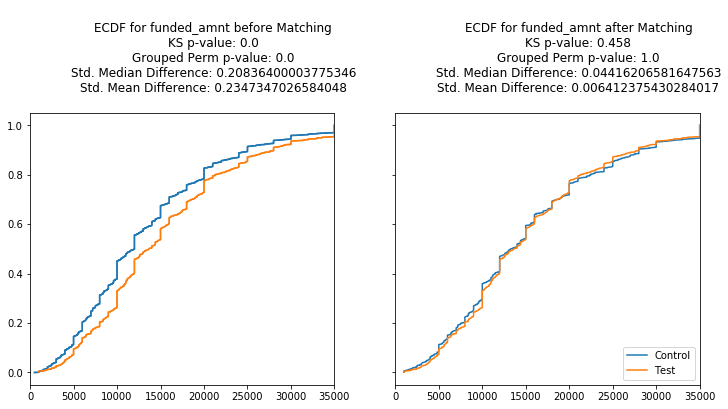

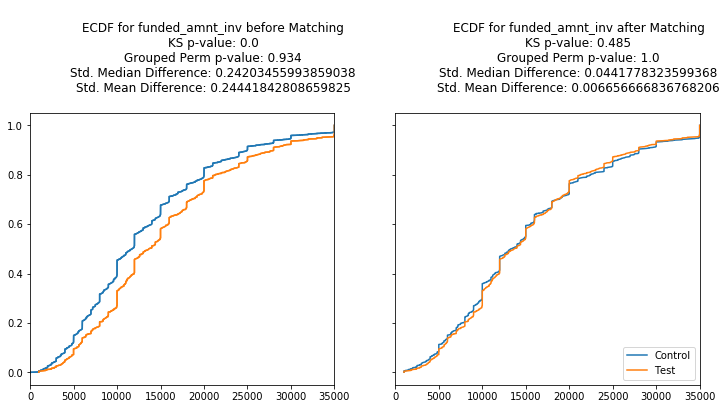

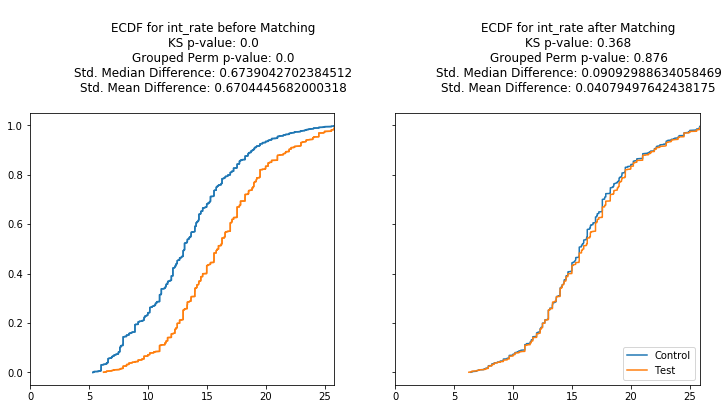

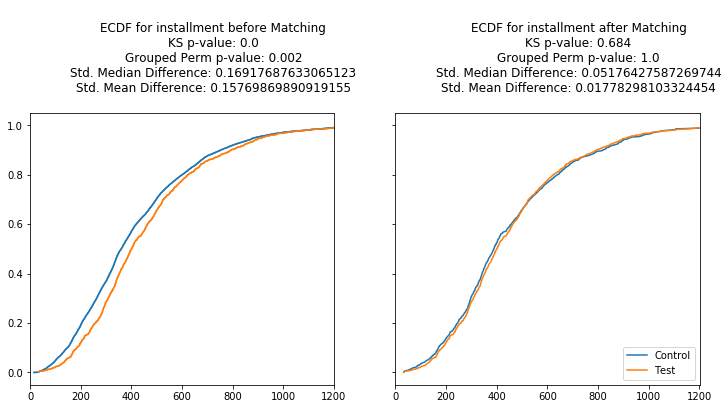

In [34]:
cc = m.compare_continuous(return_table=True)

In [35]:
cc

,var,ks_before,ks_after,grouped_chisqr_before,grouped_chisqr_after,std_median_diff_before,std_median_diff_after,std_mean_diff_before,std_mean_diff_after
0,loan_amnt,0.0,0.472,0.000,1.000,0.207814,0.044162,0.229215,0.006403
1,funded_amnt,0.0,0.458,0.000,1.000,0.208364,0.044162,0.234735,0.006412
2,funded_amnt_inv,0.0,0.485,0.934,1.000,0.242035,0.044178,0.244418,0.006657
3,int_rate,0.0,0.368,0.000,0.876,0.673904,0.090930,0.670445,0.040795
4,installment,0.0,0.684,0.002,1.000,0.169177,0.051764,0.157699,0.017783


In [36]:
m.matched_data

,record_id,weight,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,loan_status,scores,match_id
0,0,1.0,18000.0,18000.0,17975.000000,60 months,17.27,449.97,D,D3,1,0.651767,0
1,1,1.0,21250.0,21250.0,21003.604048,60 months,14.27,497.43,C,C2,1,0.430890,1
2,2,1.0,5600.0,5600.0,5600.000000,60 months,15.99,136.16,D,D2,1,0.803617,2
3,3,1.0,15975.0,15975.0,15975.000000,60 months,20.99,432.09,E,E5,1,0.863049,3
4,4,1.0,5000.0,5000.0,5000.000000,60 months,15.99,121.57,D,D2,1,0.803412,4
5,5,1.0,10000.0,10000.0,9975.000000,60 months,13.43,229.74,C,C3,1,0.699130,5
6,6,1.0,25975.0,25975.0,25854.183371,60 months,15.28,621.77,D,D3,1,0.791827,6
7,7,1.0,16000.0,16000.0,16000.000000,60 months,12.23,357.78,C,C1,1,0.658816,7
8,8,1.0,4200.0,4200.0,4200.000000,60 months,9.99,89.22,B,B4,1,0.652891,8
9,9,1.0,12000.0,12000.0,12000.000000,60 months,21.48,327.89,E,E2,1,0.513435,9
